In [3]:
# open SQL query directly in Python, rather than open from CSV

import pyodbc
import pandas as pd

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

Solicitations_Query = '''
select 
	year(A.[CloseDate]) as _Year_
	,B.EmergencyPurchase
	,C.PublicBid
	,D.SoleSource
	,E.OtherGovernmentContract
	,F.RequestForProposal
	,G.RequestForQuotation
	,H.PricingAgreement
	,I.InformalRequestForProposal
	,J.StatementofQualifications
	,K.OffertoPurchase
	,L.SoleSourceExclusionofAlternates
	,M.RequestForQualifications
	,N.RequestForInformation

from [dbo].[fs_Solicitations$] as A
left join (select
			year([CloseDate]) as _Year_
			,count(*) as EmergencyPurchase
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Emergency Purchase'
			group by year([CloseDate])) as B on B._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as PublicBid
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Public Bid'
			group by year([CloseDate])) as C on C._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as SoleSource
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Sole Source'
			group by year([CloseDate])) as D on D._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as OtherGovernmentContract
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Other Government Contract'
			group by year([CloseDate])) as E on E._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForProposal
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Proposal'
			group by year([CloseDate])) as F on F._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForQuotation
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Quotation'
			group by year([CloseDate])) as G on G._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as PricingAgreement
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Pricing Agreement'
			group by year([CloseDate])) as H on H._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as InformalRequestForProposal
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Informal Request For Proposal'
			group by year([CloseDate])) as I on I._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as StatementofQualifications
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Statement of Qualifications'
			group by year([CloseDate])) as J on J._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as OffertoPurchase
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Offer to Purchase'
			group by year([CloseDate])) as K on K._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as SoleSourceExclusionofAlternates
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Sole Source Exclusion of Alternates'
			group by year([CloseDate])) as L on L._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForQualifications
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Qualifications'
			group by year([CloseDate])) as M on M._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForInformation
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Information'
			group by year([CloseDate])) as N on N._Year_ = year(A.[CloseDate])
			
group by year([CloseDate]), B.EmergencyPurchase, C.PublicBid, D.SoleSource, E.OtherGovernmentContract
	,F.RequestForProposal ,G.RequestForQuotation ,H.PricingAgreement ,I.InformalRequestForProposal
	,J.StatementofQualifications ,K.OffertoPurchase ,L.SoleSourceExclusionofAlternates ,M.RequestForQualifications
	,N.RequestForInformation
order by year(A.[CloseDate]) desc

  '''
# save the sql query to a pandas dataframe
solicitation_data_wide = pd.read_sql(Solicitations_Query, connection)
connection.close()
solicitation_data_wide.head()

,_Year_,EmergencyPurchase,PublicBid,SoleSource,OtherGovernmentContract,RequestForProposal,RequestForQuotation,PricingAgreement,InformalRequestForProposal,StatementofQualifications,OffertoPurchase,SoleSourceExclusionofAlternates,RequestForQualifications,RequestForInformation
0,2018,NaN,18.0,NaN,NaN,24,NaN,3.0,2.0,12.0,3.0,NaN,4.0,NaN
1,2017,NaN,25.0,NaN,NaN,37,NaN,2.0,1.0,10.0,1.0,NaN,1.0,NaN
2,2016,NaN,31.0,NaN,2.0,37,NaN,3.0,1.0,11.0,2.0,NaN,1.0,NaN
3,2015,NaN,29.0,NaN,3.0,35,NaN,8.0,NaN,12.0,2.0,NaN,2.0,1.0
4,2014,NaN,38.0,NaN,NaN,31,NaN,3.0,4.0,16.0,2.0,NaN,NaN,NaN


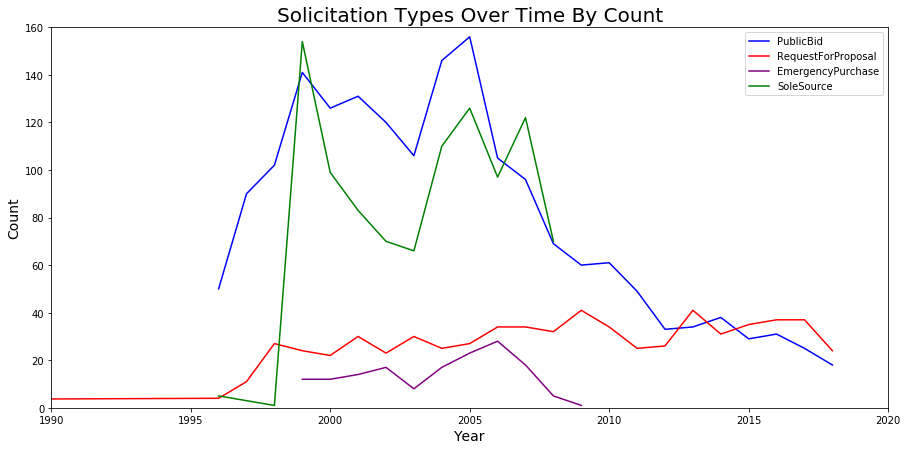

In [40]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("Solicitation Types Over Time By Count",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Count",fontsize=14)

y1 = solicitation_data_wide.PublicBid
y2 = solicitation_data_wide.RequestForProposal
y3 = solicitation_data_wide.EmergencyPurchase
y4 = solicitation_data_wide.SoleSource

x = solicitation_data_wide._Year_ 

plt.ylim(0, 160)
plt.xlim(1990,2020)

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='purple')
plt.plot(x, y4, color='green')
plt.legend()

# in terms of volume, Public Bid and Sole Source have had the highest count in the past
# more recently Public Bid and Request For Proposal have been closely matched

In [19]:
# what about dollar amounts over time, broken out by solicition types?

import pyodbc
import pandas as pd

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

solicitations_query_long = '''
select * from [dbo].[fs_Solicitations$]
'''

# save the sql query to a pandas dataframe
solicitaion_data_long = pd.read_sql(solicitations_query_long, connection)
connection.close()
solicitaion_data_long.head()

,SolicitationID,Solicitation,SoliciationType,Title,CloseDate,Description,Addenda,StaffContact,Status,IsLocalPresenceRequired,IsPreBidConferenceMandatory,PreBidConference,Category,Estimate
0,112593.0,19PB005,Public Bid,PUBLIC BID<BR>PAIUTE NEIGHBORHOOD CENTER (PNC)...,2018-10-26 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"Karie Ingles, Bid & Contract Specialist",Posted,True,True,A mandatory pre-bid conference will be held at...,7.0,NaN
1,112552.0,19RP006,Request For Proposal,REQUEST FOR PROPOSAL<BR>ARBITRAGE REBATE SERVICES,2018-10-24 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"John Snow, Bid & Contract Specialist",Posted,False,False,None,9.0,26000.0
2,112610.0,19RP008,Request For Proposal,REQUEST FOR PROPOSAL<BR>RENOVATIONS OF FRONT E...,2018-10-19 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"Karie Ingles, Bid & Contract Specialist",Posted,False,False,A Pre-Bid Conference will be held at 3:00 P.M....,9.0,120000.0
3,112474.0,19RP003,Request For Proposal,REQUEST FOR PROPOSAL<BR>CUSTODIAL SERVICES FOR...,2018-10-17 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"John Snow, Bid & Contract Specialist",Posted,True,True,A mandatory Pre-Bid Conference will be held at...,9.0,365000.0
4,112612.0,19IP001,Informal Request For Proposal,INFORMAL REQUEST FOR PROPOSAL<BR>EXECUTIVE REC...,2018-10-11 15:00:00,The City of Scottsdale invites sealed submitta...,3.0,"Michelle Gerola, Buyer",Posted,False,False,None,9.0,20000.0


In [21]:

solicitaion_data_long['CloseDate'] = pd.to_datetime(solicitaion_data_long['CloseDate']) #converte 'CloseDate' to datetime format
solicitaion_data_long['Year'] = solicitaion_data_long['CloseDate'].dt.year #converte 'CloseDate' to year

solicitaion_data_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5973 entries, 0 to 5972
Data columns (total 15 columns):
SolicitationID                 5973 non-null float64
Solicitation                   5973 non-null object
SoliciationType                5973 non-null object
Title                          5973 non-null object
CloseDate                      5973 non-null datetime64[ns]
Description                    4726 non-null object
Addenda                        5973 non-null float64
StaffContact                   5966 non-null object
Status                         5973 non-null object
IsLocalPresenceRequired        5973 non-null bool
IsPreBidConferenceMandatory    5973 non-null bool
PreBidConference               2224 non-null object
Category                       5973 non-null float64
Estimate                       5102 non-null float64
Year                           5973 non-null int64
dtypes: bool(2), datetime64[ns](1), float64(4), int64(1), object(7)
memory usage: 618.4+ KB


In [42]:
solicitaion_data_long.head()

,SolicitationID,Solicitation,SoliciationType,Title,CloseDate,Description,Addenda,StaffContact,Status,IsLocalPresenceRequired,IsPreBidConferenceMandatory,PreBidConference,Category,Estimate,Year
0,112593.0,19PB005,Public Bid,PUBLIC BID<BR>PAIUTE NEIGHBORHOOD CENTER (PNC)...,2018-10-26 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"Karie Ingles, Bid & Contract Specialist",Posted,True,True,A mandatory pre-bid conference will be held at...,7.0,NaN,2018
1,112552.0,19RP006,Request For Proposal,REQUEST FOR PROPOSAL<BR>ARBITRAGE REBATE SERVICES,2018-10-24 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"John Snow, Bid & Contract Specialist",Posted,False,False,None,9.0,26000.0,2018
2,112610.0,19RP008,Request For Proposal,REQUEST FOR PROPOSAL<BR>RENOVATIONS OF FRONT E...,2018-10-19 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"Karie Ingles, Bid & Contract Specialist",Posted,False,False,A Pre-Bid Conference will be held at 3:00 P.M....,9.0,120000.0,2018
3,112474.0,19RP003,Request For Proposal,REQUEST FOR PROPOSAL<BR>CUSTODIAL SERVICES FOR...,2018-10-17 14:00:00,The City of Scottsdale invites sealed submitta...,0.0,"John Snow, Bid & Contract Specialist",Posted,True,True,A mandatory Pre-Bid Conference will be held at...,9.0,365000.0,2018
4,112612.0,19IP001,Informal Request For Proposal,INFORMAL REQUEST FOR PROPOSAL<BR>EXECUTIVE REC...,2018-10-11 15:00:00,The City of Scottsdale invites sealed submitta...,3.0,"Michelle Gerola, Buyer",Posted,False,False,None,9.0,20000.0,2018


In [34]:
solicitaions_grouped = solicitaion_data_long.groupby(['Year', 'SoliciationType']).sum()['Estimate'].unstack()
solicitaions_grouped = solicitaions_grouped.drop([1900, 1933]) # exclude years prior to Scottsdale being incorporated

solicitaions_grouped.head(20)

SoliciationType,Emergency Purchase,Informal Request For Proposal,Offer to Purchase,Other Government Contract,Pricing Agreement,Public Bid,Request For Information,Request For Proposal,Request For Qualifications,Request For Quotation,Sole Source,Sole Source Exclusion of Alternates,Statement of Qualifications
Year,,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1997,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1998,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1999,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2000,0.0,0.0,0.0,NaN,0.0,0.0,NaN,231000.0,NaN,0.0,0.0,NaN,NaN
2001,0.0,0.0,0.0,NaN,0.0,30000.0,NaN,205000.0,NaN,0.0,0.0,NaN,NaN
2002,0.0,0.0,0.0,NaN,0.0,549000.0,NaN,156000.0,NaN,0.0,0.0,NaN,NaN
2003,0.0,19000.0,0.0,NaN,0.0,929200.0,NaN,3130000.0,NaN,11000.0,13200.0,NaN,NaN
2004,222887.0,20000.0,0.0,NaN,20000.0,6389773.0,NaN,3526100.0,NaN,36200.0,2777580.0,NaN,NaN


Text(0.5, 1.0, 'Solicitation Types Over Time By $ Value')

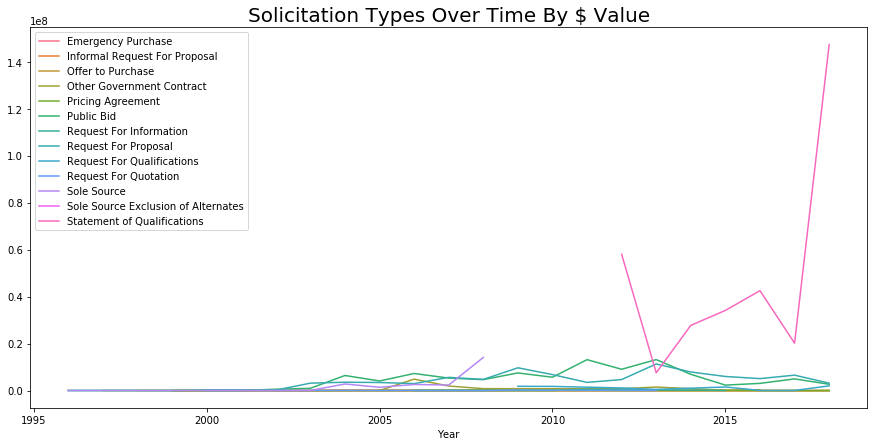

In [43]:
import seaborn as sns

plt.rcParams["figure.figsize"] = [15, 7]
sns.lineplot(data=solicitaions_grouped, dashes=False)
plt.title("Solicitation Types Over Time By $ Value",fontsize=20)
